In [1]:
import numpy as np 
import math

## 1 Architecture of a Neural Network

### Single neuron
<img src='media/simple_nn/single_neuron.png' width="450px"/>

In [7]:
def single_neuron(input_value: float, weight: float):
    return input_value * weight

### Aggregating neurons to one output
We can aggregate multiple neurons, each representing a different feature, to produce a more accurate representation
<br /><br 
         />
<img src='media/simple_nn/multiple_neurons.png' width="450px"/>

In [10]:
def multiple_input_to_one_output(inputs: np.array, weights: np.array):
    return np.dot(inputs, weights)

### Multiple neurons to multiple outputs
We can map multiple input neurons to multiple outputs as well
<br /><br />
<img src='media/simple_nn/multiple_neurons_multiple_outputs.png' width="450px"/>

In [58]:
def input_dense_layer(input_neurons: int, output_neurons: int):
    # We define weight matrix with randomly intialized weights
    weights = np.random.rand(output_neurons, input_neurons)
    return lambda x: np.dot(weights, x)

In [51]:
input_dense_layer(input_neurons = 3, output_neurons = 2)(np.array([2,2,3]))

array([4.28240336, 2.58377314])

### Using this logic, we can create multiple layers that stack on top of one another to form layers
By stacking many of these layers, we can now create a network, a "neural network", consisting of multiple layers of neurons. We pass the outputs of each layer as inputs into another layer. This usually allows for improved "predictive/forecasting" abilities as it allows the network to model more complex problems
<br /><br />

<img src='media/simple_nn/multiple_layers.png' width="450px"/>

In [56]:
def neural_network_single_pass(input_features: np.array):
    input_layer = input_dense_layer(input_neurons = 4, output_neurons = 4)(input_features)
    hidden_layer = input_dense_layer(input_neurons = 4, output_neurons = 4)(input_layer)
    output_layer = input_dense_layer(input_neurons = 4, output_neurons = 4)(hidden_layer)
    return output_layer

In [57]:
neural_network_single_pass(input_features = np.array([1,2,3,4]))

array([30.45788016, 29.52960404, 14.09560955, 32.49632235])

However, this neural network does not "learn". All it does is pass out new values, which are used as inputs to the next layers, nothing meaningful. So we need to give it context. I.e. A problem to solve, and expected solutions to the problem. To do this, we need to understand the concept of gradient descent

## 2 Error and Learning Rates

### Error on a single neuron

Given an expected output, our single neuron doesnt predict to perfect accuracy on our randomly intialised weights. Our error is 0.01. 

<img src='../media/simple_nn/single_neuron_error.png' width="450px"/>

In order for our model to evaluate better, it needs to "learn". We can do this by setting the "learning rate", such that our weight adjusts based on the error rate to eventually give us the correct answer. In this example, we give the simple method of calculating error by taking: <br />

Error = Prediction - Actual

We aim to reduce the error in our network by updating the weights, ideally to match this scenario. 

<img src='media/simple_nn/perfect_prediction.png' width="450px"/>

To get to this, we can perform gradient descent to get to the correct weights much quicker

### Gradient Descent

Gradient descent aims to minimise the error by perform a sequence of weight updates

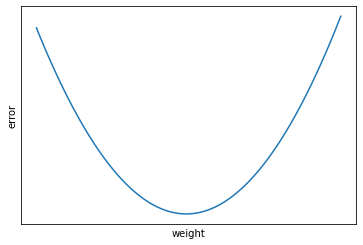

In [41]:
input_value = 8 
expected_output = 39
initial_weight = 0.1

error = (input_value * initial_weight - expected_output) ** 2 # MSE

## Error weight curve 
weights = np.arange(100) * initial_weight
errors = (input_value * weights - expected_output) ** 2

plot_descent = plt.plot(weights, errors)
plot_edits = plt.xticks([]), plt.yticks([]), plt.ylabel("error"), plt.xlabel("weight")

as we can see, the error decreases and eventually reaches a minimum at a certain set weight. Our goal is to get there, with gradient descent.

Our goal is to simply reduce this 

error = (input * weight - target_prediction) ** 2 

or at least the method of error calculation

In [188]:
weight = 0.5
target_prediction = 0.8
input_value = 0.5

In [189]:
predictions = []

for i in range(20):
    error = (input_value * weight - target_prediction) ** 2
    ## We get weight_delta by getting the derivative of error with respect to weight (in order to minimize error)
    ## This is because input_value and target_prediction are CONSTANTS.
    weight_delta = (weight * input_value  - target_prediction) * input_value ## Multiply by input_value gives us a direction
    weight -= weight_delta
    predictions.append((error, weight))
    print("Prediction: " + str(round(weight * input_value,2)) + "   Error: " + str(round(error,2)))

Prediction: 0.39   Error: 0.3
Prediction: 0.49   Error: 0.17
Prediction: 0.57   Error: 0.1
Prediction: 0.63   Error: 0.05
Prediction: 0.67   Error: 0.03
Prediction: 0.7   Error: 0.02
Prediction: 0.73   Error: 0.01
Prediction: 0.74   Error: 0.01
Prediction: 0.76   Error: 0.0
Prediction: 0.77   Error: 0.0
Prediction: 0.78   Error: 0.0
Prediction: 0.78   Error: 0.0
Prediction: 0.79   Error: 0.0
Prediction: 0.79   Error: 0.0
Prediction: 0.79   Error: 0.0
Prediction: 0.79   Error: 0.0
Prediction: 0.8   Error: 0.0
Prediction: 0.8   Error: 0.0
Prediction: 0.8   Error: 0.0
Prediction: 0.8   Error: 0.0


Visualising the gradient descent - note how the errors eventually converge to a minimum

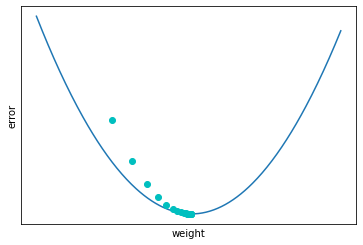

In [211]:
plt.plot(np.arange(0, 315) * 0.01, (input_value * np.arange(0, 315) * 0.01 - target_prediction) ** 2)
for points in predictions:
    plt.plot(points[1], points[0], 'co')
plot_edits = plt.xticks([]), plt.yticks([]), plt.ylabel("error"), plt.xlabel("weight")

##### Exploding and vanishing gradient problem

This problem occurs when the weight corrections "explodes" or becomes exceedingly large or small to the point it doesnt help with improving accuracy. This happens because the large error gradients accumulate (usually for large "whole number" predictions) or smaller ones (for small floats). 

In [174]:
weight = 0.5
target_prediction = 1.5
input_value = 421

In [175]:
for i in range(20):
    error = (input_value * weight - target_prediction) ** 2
    ## We get weight_delta by getting the derivative of error with respect to weight (in order to minimize error)
    ## This is because input_value and target_prediction are CONSTANTS.
    weight_delta = (weight * input_value  - target_prediction) * input_value ## Multiply by input_value gives us a direction
    weight -= weight_delta
    predictions.append((error, ))
    print("Prediction: " + str(round(weight * input_value,2)) + "   Error: " + str(round(weight,2)))

Prediction: -37043158.5   Error: -87988.5
Prediction: 6565529678401.5   Error: 15595082371.5
Prediction: -1.163674480199616e+18   Error: -2764072399524028.5
Prediction: 2.0624966487057994e+23   Error: 4.899041920916388e+20
Prediction: -3.655569060166159e+28   Error: -8.683061900632206e+25
Prediction: 6.479130602238501e+33   Error: 1.5389858912680525e+31
Prediction: -1.1483611079407518e+39   Error: -2.727698593683496e+36
Prediction: 2.0353552277141886e+44   Error: 4.834572987444628e+41
Prediction: -3.607463605600628e+49   Error: -8.56879716294686e+46
Prediction: 6.393868494566553e+54   Error: 1.5187336091607014e+52
Prediction: -1.133249251976976e+60   Error: -2.6918034488764276e+57
Prediction: 2.0085709742039923e+65   Error: 4.77095243278858e+62
Prediction: -3.559991194679156e+70   Error: -8.456036091874479e+67
Prediction: 6.309728393449335e+75   Error: 1.4987478369238327e+73
Prediction: -1.1183362604549602e+81   Error: -2.656380666163801e+78
Prediction: 1.9821391880303715e+86   Error: 

In [ ]:

plt.plot(105,200,'ro') 

the predictions go out of hand! one way to solve this problem is to introduce an alpha term to multiply the weight delta with, allowing it to be kept within control. The alpha value is usually guessed until it brings us closer to our target predictions.

In [172]:
weight = 0.5
target_prediction = 1.5
input_value = 421
alpha = 0.00001148

In [173]:
for i in range(20):
    error = (input_value * weight - target_prediction) ** 2
    ## We get weight_delta by getting the derivative of error with respect to weight (in order to minimize error)
    ## This is because input_value and target_prediction are CONSTANTS.
    weight_delta = (weight * input_value  - target_prediction) * input_value  ## Multiply by input_value gives us a direction
    weight -= weight_delta * alpha
    print("Prediction: " + str(round(weight * input_value,2)) + "   Error: " + str(round(weight,2)))

Prediction: -214.76   Error: -0.51
Prediction: 225.27   Error: 0.54
Prediction: -230.04   Error: -0.55
Prediction: 241.08   Error: 0.57
Prediction: -246.4   Error: -0.59
Prediction: 258.01   Error: 0.61
Prediction: -263.92   Error: -0.63
Prediction: 276.13   Error: 0.66
Prediction: -282.67   Error: -0.67
Prediction: 295.54   Error: 0.7
Prediction: -302.75   Error: -0.72
Prediction: 316.31   Error: 0.75
Prediction: -324.25   Error: -0.77
Prediction: 338.56   Error: 0.8
Prediction: -347.26   Error: -0.82
Prediction: 362.37   Error: 0.86
Prediction: -371.91   Error: -0.88
Prediction: 387.87   Error: 0.92
Prediction: -398.29   Error: -0.95
Prediction: 415.17   Error: 0.99
